# AIML 302 Part 4 - Exercises with Results

## Exercise 1

#### Task 1 
##### Load libraries that are used in this module.

#### Result:

In [1]:
# Helper packages.
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Packages with tools for text processing.
import nltk

# Packages for working with text data.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Packages for getting data ready for and building a LDA model
import gensim
from gensim import corpora, models
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel



#### Task 2 
##### Set `data_dir` to the data directory.

In [2]:
data_dir = "/home/jovyan/iqvia-aiml-302/data"


#### Task 3
##### Load the pickled files from the last class: `dictionary_ex.sav`, `corpus_tfidf_ex.sav` and `title_clean.sav`
##### Name them `dictionary_ex`, `corpus_tfidf_ex`, and `processed_docs_ex`.

#### Result:

In [4]:
# Load pickled data and models.
dictionary_ex = pickle.load(open(data_dir + "/dictionary_ex.sav","rb")) 
corpus_tfidf_ex = pickle.load(open(data_dir + "/corpus_tfidf_ex.sav","rb"))
processed_docs_ex = pickle.load(open(data_dir + "/title_clean.sav","rb"))

#### Task 4 
##### Now we are going to run LDA on our `corpus_tfidf_ex` object.
##### Choose the same parameters as we did in the slides.
##### Save the model as `lda_model_tfidf_ex` and print.

#### Result:

In [5]:
lda_model_tfidf_ex = gensim.models.LdaMulticore(corpus_tfidf_ex, num_topics = 5, 
                                                id2word = dictionary_ex, workers = 4, passes = 2)

In [6]:
print(lda_model_tfidf_ex)

LdaModel(num_terms=285, num_topics=5, decay=0.5, chunksize=2000)


#### Task 5
##### Look at the output of your LDA model, print each of the 5 topics and the top words within each topic.
##### Then, take the first doc from `processed_docs_ex` and classify it within one of the five topics. Which one is it most similar to?

#### Result:

In [7]:
# Look at all 5 topics and top words within each one.
for idx, topic in lda_model_tfidf_ex.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.048*"loan" + 0.026*"project" + 0.025*"concern" + 0.025*"annex" + 0.022*"protocol" + 0.019*"guarante" + 0.019*"letter" + 0.015*"develop" + 0.014*"gener" + 0.014*"amend"
Topic: 1 Word: 0.066*"agricultur" + 0.064*"commod" + 0.064*"sale" + 0.035*"credit" + 0.030*"develop" + 0.022*"project" + 0.020*"applic" + 0.019*"supplementari" + 0.018*"annex" + 0.018*"gener"
Topic: 2 Word: 0.035*"extend" + 0.034*"amend" + 0.031*"air" + 0.029*"transport" + 0.025*"convent" + 0.023*"note" + 0.023*"constitut" + 0.022*"exchang" + 0.020*"protocol" + 0.019*"concern"
Topic: 3 Word: 0.049*"amend" + 0.034*"constitut" + 0.032*"note" + 0.032*"exchang" + 0.023*"march" + 0.019*"june" + 0.019*"april" + 0.017*"decemb" + 0.014*"concern" + 0.014*"convent"
Topic: 4 Word: 0.033*"govern" + 0.031*"unit" + 0.027*"state" + 0.023*"america" + 0.019*"republ" + 0.018*"assist" + 0.016*"trade" + 0.016*"defens" + 0.016*"mutual" + 0.014*"convent"


In [8]:
# Classify the first doc in processed_docs_ex.
for index, score in sorted(lda_model_tfidf_ex[corpus_tfidf_ex[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf_ex.print_topic(index, 10)))

# Document 1 is the closest to Topic 1 since it has the highest score in relation to topic 1.
# Note: The result might vary sometimes based on the system you are using!


Score: 0.47503677010536194	 
Topic: 0.066*"agricultur" + 0.064*"commod" + 0.064*"sale" + 0.035*"credit" + 0.030*"develop" + 0.022*"project" + 0.020*"applic" + 0.019*"supplementari" + 0.018*"annex" + 0.018*"gener"

Score: 0.34620797634124756	 
Topic: 0.033*"govern" + 0.031*"unit" + 0.027*"state" + 0.023*"america" + 0.019*"republ" + 0.018*"assist" + 0.016*"trade" + 0.016*"defens" + 0.016*"mutual" + 0.014*"convent"

Score: 0.061829615384340286	 
Topic: 0.048*"loan" + 0.026*"project" + 0.025*"concern" + 0.025*"annex" + 0.022*"protocol" + 0.019*"guarante" + 0.019*"letter" + 0.015*"develop" + 0.014*"gener" + 0.014*"amend"

Score: 0.0588434562087059	 
Topic: 0.035*"extend" + 0.034*"amend" + 0.031*"air" + 0.029*"transport" + 0.025*"convent" + 0.023*"note" + 0.023*"constitut" + 0.022*"exchang" + 0.020*"protocol" + 0.019*"concern"

Score: 0.0580822229385376	 
Topic: 0.049*"amend" + 0.034*"constitut" + 0.032*"note" + 0.032*"exchang" + 0.023*"march" + 0.019*"june" + 0.019*"april" + 0.017*"decemb"

## Exercise 2

#### Task 1 
##### Find the topic coherence for the LDA model.
##### Save it as `coherence_lda_ex` and print it out.

#### Result:

In [9]:
coherence_model_lda = CoherenceModel(model = lda_model_tfidf_ex, texts = processed_docs_ex, 
                                     dictionary = dictionary_ex, coherence = 'c_v')
coherence_lda_ex = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda_ex)

Coherence Score:  0.3944755464178562


#### Task 2 
##### Define the convenience function `compute_coherence_values` and tweak parameters as you think needed.
##### Set the seed to 1.
##### Compute the `model_list` and `coherence_values` using the function above.
##### There are more titles so maybe more topics will be necessary as a limit, hence set `limit` as `80`.

#### Result:

In [10]:
# Convenience function defined in class.
def compute_coherence_values(dictionary, corpus, texts, limit, start = 2, step = 3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus = corpus, id2word = dictionary, num_topics = num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [11]:
# This code may take a while to run 
np.random.seed(1)
model_list, coherence_values = compute_coherence_values(dictionary = dictionary_ex, corpus = corpus_tfidf_ex, 
                                                        texts = processed_docs_ex, start = 2, limit = 80, step = 6)

#### Task 3 
##### Plot the findings from `model_list` and `coherence_values`.
##### Set `x` as the range where `start` is `2`, `limit` is `80` and `step` `6`.
##### Plot `x` against `coherence_values`. Label the axes accordingly.
##### What would improve our LDA model, what number of topics make the most sense?

#### Result:

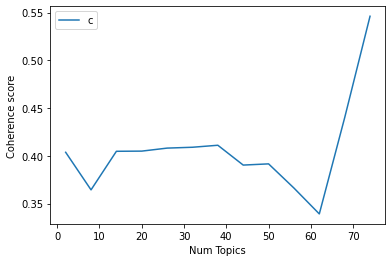

In [12]:
# Plot the optimal number of topics.
limit = 80; start = 2; step = 6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc = 'best')
plt.show()


#### Task 4
##### Pickle `lda_model_tfidf_ex` for the next session.


#### Result:

In [13]:
pickle.dump(lda_model_tfidf_ex, open(data_dir + '/lda_model_tfidf_ex.sav', 'wb'))